In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
df = pd.read_csv('data/hitters.csv')

In [3]:
df_cruns = df[['CRuns']]

In [4]:
print(df_cruns.isnull().sum())

CRuns    0
dtype: int64


In [5]:
scaler = StandardScaler()
df_cruns_scaled = scaler.fit_transform(df_cruns)

In [6]:
Z = linkage(df_cruns_scaled, method='ward')

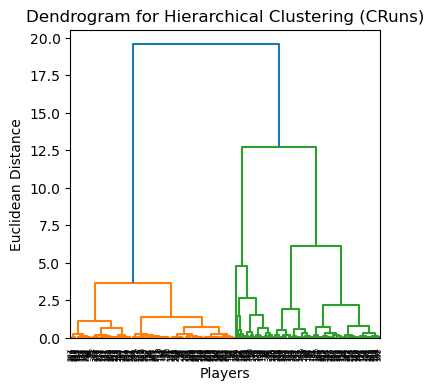

In [8]:
plt.figure(figsize=(4,4))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering (CRuns)')
plt.xlabel('Players')
plt.ylabel('Euclidean Distance')
plt.show()

In [10]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
# Assign cluster labels to the dataframe
df['Cluster'] = hc.fit_predict(df_cruns_scaled)

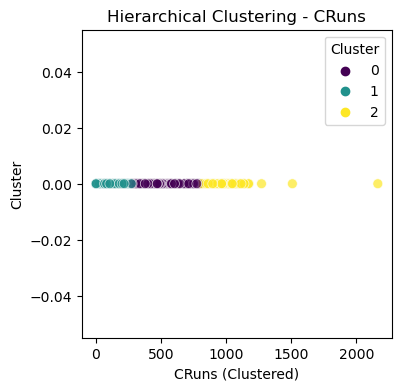

In [15]:
# Plot the 'CRuns' values and color them based on their cluster
plt.figure(figsize=(4,4))
sns.scatterplot(x=df['CRuns'], 
                y=np.zeros_like(df['CRuns']), 
                hue=df['Cluster'], 
                palette='viridis', 
                s=50, alpha=0.7)
plt.title('Hierarchical Clustering - CRuns')
plt.xlabel('CRuns (Clustered)')
plt.ylabel('Cluster')
plt.show()

In [17]:
print(df[['AtBat', 'Hits', 'HmRun', 'CRuns', 'Cluster']])

     AtBat  Hits  HmRun  CRuns  Cluster
0      293    66      1     30        1
1      315    81      7    321        0
2      479   130     18    224        1
3      496   141     20    828        2
4      321    87     10     48        1
..     ...   ...    ...    ...      ...
317    497   127      7    379        0
318    492   136      5    897        2
319    475   126      3    217        1
320    573   144      9    470        0
321    631   170      9    775        0

[322 rows x 5 columns]
